In [1]:
# Install latest version from GitHub
!pip install -q -U git+https://github.com/jdvelasq/techminer

# Documents by terms

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

from techminer import DataFrame, Plot, heatmap, extract_country

#
# Data loading
#
df = DataFrame(
    pd.read_json(
        "https://raw.githubusercontent.com/jdvelasq/techminer/master/data/tutorial/"
        + "cleaned-data.json",
        orient="records",
        lines=True,
    )
)

#
# Columns of the dataframe
#
df.columns

Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Affiliations', 'Document Type', 'Access Type', 'Source', 'EID',
       'Abstract', 'Author Keywords', 'Index Keywords', 'References',
       'keywords', 'CONF', 'fingerprint', 'keywords_cleaned', 'ID',
       'top_10_Authors_freq', 'top_10_keywords_freq',
       'top_10_Source_title_freq', 'top_10_Authors_cited_by',
       'top_10_keywords_cited_by', 'top_10_Source_title_cited_by'],
      dtype='object')

## Document Type

In [3]:
#
# Dataframe of number of documents by `Document Type`
#
df.documents_by_term("Document Type")

,Document Type,Num Documents,ID
0,Conference Paper,89,"[7, 8, 9, 12, 13, 14, 15, 16, 17, 19, 20, 21, ..."
1,Article,52,"[0, 1, 2, 3, 4, 5, 6, 10, 11, 18, 25, 27, 28, ..."
2,Article in Press,2,"[92, 95]"
3,Book Chapter,1,[137]
4,Conference Review,1,[142]


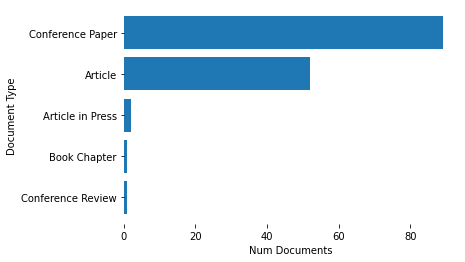

In [4]:
## %matplotlib widget

#
# Horizontal bar plot of the number of documents by `Document Type`
#
Plot(df.documents_by_term("Document Type")).barh()
plt.show()

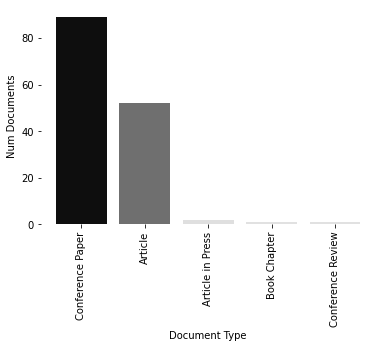

In [5]:
## %matplotlib widget

#
# Bar plot of the number of documents by `Document Type`
#
Plot(df.documents_by_term("Document Type")).bar()
plt.show()

In [6]:
# df.documents_by_terms("Document Type").altair_barhplot()

In [7]:
# df.documents_by_terms("Document Type").seaborn_barhplot()

In [8]:
# df.documents_by_terms("Document Type").altair_barplot()

In [9]:
# df.documents_by_terms("Document Type").seaborn_barplot()

## Source title

In [10]:
#
# Number of documents by `Source title`
#
df.documents_by_term("Source title")

,Source title,Num Documents,ID
0,Lecture Notes in Computer Science (including s...,18,"[36, 42, 45, 49, 88, 89, 96, 97, 98, 99, 100, ..."
1,Expert Systems with Applications,5,"[0, 1, 11, 54, 140]"
2,IEEE Access,5,"[34, 38, 39, 46, 47]"
3,Procedia Computer Science,4,"[40, 48, 90, 91]"
4,Advances in Intelligent Systems and Computing,3,"[41, 51, 52]"
...,...,...,...
98,Soft Computing,1,[43]
99,Symmetry,1,[108]
100,WebMedia 2015 - Proceedings of the 21st Brazil...,1,[129]
101,WebMedia 2018 - Proceedings of the 24th Brazil...,1,[61]


## Keywords

In [11]:
#
# Number of documents by `Keyword`
# 
df.documents_by_term("keywords_cleaned", sep=";").head(10)

,keywords_cleaned,Num Documents,ID
0,forecasting,110,"[3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, ..."
1,time series,95,"[3, 6, 7, 8, 9, 11, 12, 14, 15, 17, 18, 19, 22..."
2,market,78,"[3, 4, 6, 7, 9, 11, 12, 16, 18, 20, 21, 22, 26..."
3,deep learning,70,"[3, 4, 7, 13, 15, 19, 22, 23, 25, 26, 27, 30, ..."
4,neural networks,70,"[2, 5, 6, 7, 9, 10, 14, 16, 17, 18, 19, 25, 26..."
5,trading,66,"[3, 4, 6, 9, 11, 12, 16, 18, 19, 20, 26, 28, 3..."
6,commerce,62,"[3, 4, 6, 7, 9, 19, 20, 22, 23, 26, 28, 34, 35..."
7,recurrent neural networks,52,"[2, 6, 8, 9, 11, 12, 16, 17, 20, 26, 28, 30, 3..."
8,long short term memory network,49,"[0, 1, 4, 6, 7, 12, 24, 26, 30, 31, 34, 35, 41..."
9,prediction,46,"[3, 6, 8, 11, 15, 19, 20, 35, 36, 38, 39, 40, ..."


## Country

In [12]:
#
# Creates a new column called `Country` with the country of 
# affiliation of the authors.
#
df["Country"] = df["Affiliations"].map(lambda x: extract_country(x, sep=";"))

#
# Dataframe with the number of documents by `Country`.
#
df.documents_by_term("Country", sep=";").head(15)

,Country,Num Documents,ID
0,China,50,"[3, 4, 6, 7, 10, 13, 15, 27, 29, 33, 34, 37, 3..."
1,United States,14,"[3, 22, 23, 26, 30, 35, 69, 73, 84, 85, 104, 1..."
2,United Kingdom,13,"[5, 7, 11, 28, 35, 59, 87, 89, 108, 125, 133, ..."
3,India,11,"[9, 50, 51, 56, 57, 72, 90, 106, 112, 113, 130]"
4,Taiwan,10,"[14, 17, 19, 42, 60, 71, 92, 116, 138, 141]"
5,Italy,7,"[18, 24, 30, 103, 120, 127, 134]"
6,Germany,6,"[31, 39, 62, 70, 93, 137]"
7,Singapore,5,"[4, 6, 86, 109, 135]"
8,Canada,4,"[0, 20, 24, 134]"
9,Colombia,4,"[52, 94, 100, 121]"


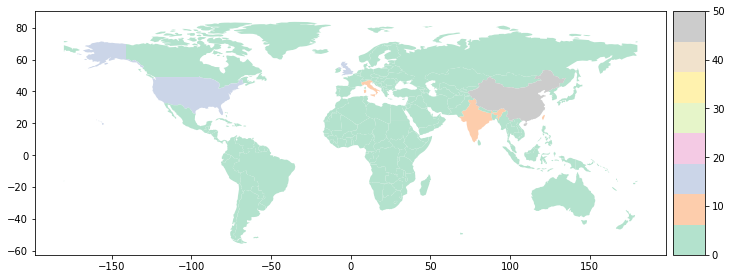

In [13]:
#
# Worldmap with the number of documents by country
#
plt.figure(figsize=(12,5))
Plot(df.documents_by_term("Country", sep=";")).worldmap()
plt.show()